# 1. DataLoader & parsing

In [1]:
import numpy as np
import pandas as pd

In [2]:
data_path = '../../kaggle_data/creditcard_overdue/open/'
pre_path = '../../kaggle_data/creditcard_overdue/preprocess/'

y_train = pd.read_csv(data_path + 'train.csv')
y_train = y_train['credit']

Raw_train = pd.read_csv(pre_path + 'train_preprocess.csv')
Raw_test = pd.read_csv(pre_path + 'test_preprocess.csv')
submission = pd.read_csv(pre_path + 'sample_submission.csv')

In [3]:
Raw_train.head()

,Unnamed: 0,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month
0,0,0,0,0,0,0,0,3,1,2,3,1,0,0,0,0,2.0,0
1,1,0,0,1,1,0,0,2,0,1,2,1,0,0,1,1,3.0,0
2,2,1,1,1,0,1,4,3,1,1,6,1,0,1,0,2,2.0,1
3,3,0,0,1,0,0,0,2,1,1,4,1,0,1,0,3,2.0,2
4,4,0,1,1,0,0,2,3,1,1,4,1,0,0,0,2,2.0,1


In [4]:
y_train.head()

0    1.0
1    1.0
2    2.0
3    0.0
4    2.0
Name: credit, dtype: float64

In [5]:
Raw_test.head()

,Unnamed: 0,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,0,26457,1,1,0,0,0,1,2,0,1,8,0,1,0,1,0,0,2.0,3
1,1,26458,0,0,1,0,0,2,3,1,1,6,1,1,0,1,0,5,2.0,2
2,2,26459,0,0,1,0,0,4,2,1,1,4,1,1,1,1,0,1,2.0,2
3,3,26460,1,1,0,0,0,0,2,1,1,6,1,1,1,0,0,6,2.0,2
4,4,26461,0,1,1,0,0,2,3,1,1,5,1,1,1,0,0,2,2.0,0


# 2. Drop un-use features

In [6]:
X_train = Raw_train.drop(['Unnamed: 0'], axis=1)
X_test = Raw_test.drop(['Unnamed: 0', 'index', 'FLAG_MOBIL'], axis=1)

In [7]:
X_train.shape

(26457, 17)

In [8]:
X_test.shape

(10000, 17)

In [9]:
X_test.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month
0,1,1,0,0,0,1,2,0,1,8,0,0,1,0,0,2.0,3
1,0,0,1,0,0,2,3,1,1,6,1,0,1,0,5,2.0,2
2,0,0,1,0,0,4,2,1,1,4,1,1,1,0,1,2.0,2
3,1,1,0,0,0,0,2,1,1,6,1,1,0,0,6,2.0,2
4,0,1,1,0,0,2,3,1,1,5,1,1,0,0,2,2.0,0


In [10]:
X_train.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month
0,0,0,0,0,0,0,3,1,2,3,1,0,0,0,0,2.0,0
1,0,0,1,1,0,0,2,0,1,2,1,0,0,1,1,3.0,0
2,1,1,1,0,1,4,3,1,1,6,1,0,1,0,2,2.0,1
3,0,0,1,0,0,0,2,1,1,4,1,0,1,0,3,2.0,2
4,0,1,1,0,0,2,3,1,1,4,1,0,0,0,2,2.0,1


# 3. train/val split

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                 stratify=y_train, test_size=0.3,
                                                 random_state=42)

print("Train set")
print(X_train.shape)
print(y_train.shape)
print("==================")
print("Validation set")
print(X_val.shape)
print(y_val.shape)

Train set
(18519, 17)
(18519,)
Validation set
(7938, 17)
(7938,)


# 4. Models & training

In [12]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score

k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

## 4-1. RandomForest

In [13]:
feat_labels = X_train.columns

forest = RandomForestClassifier()

forest_param_grid = {"max_depth" : [13, 15, 17],
                    "n_estimators" : [500, 600],
                    "criterion" : ["gini", "entropy"],
                    "random_state" : [42]}

gs_forest = GridSearchCV(forest, forest_param_grid, 
                       cv=k_fold, scoring="neg_log_loss", verbose=1, n_jobs=-1)

gs_forest.fit(X_train, y_train)

forest_best = gs_forest.best_estimator_

print('best_score : ', gs_forest.best_score_)
print('best_params : \n', gs_forest.best_params_)

forest_best.fit(X_train, y_train)

importances = forest_best.feature_importances_

val_pred_forest = forest_best.predict_proba(X_val)
predict_forest = forest_best.predict_proba(X_test)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
best_score :  -0.8192968025331313
best_params : 
 {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 600, 'random_state': 42}


### 4-1-1. RandomForest (without GridSearchCV)

In [13]:
forest_best = RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=600, random_state=42)

feat_labels = X_train.columns

forest_best.fit(X_train, y_train)

importances = forest_best.feature_importances_

val_pred_forest = forest_best.predict_proba(X_val)
predict_forest = forest_best.predict_proba(X_test)

### 4-1-2. Feature importance

 1) occyp_type                     0.1470898971053921
 2) DAYS_BIRTH                     0.13112098949185994
 3) begin_month                    0.1189117993808401
 4) edu_type                       0.06249396557046794
 5) family_type                    0.059680536308183575
 6) income_type                    0.054046939394534976
 7) family_size                    0.05125698059006873
 8) reality                        0.0454049802265021
 9) house_type                     0.04518196697988942
10) income_total                   0.04366616719762189
11) car                            0.043392150625378004
12) phone                          0.043198971585966486
13) gender                         0.04179134200407448
14) child_num                      0.03957076900645813
15) work_phone                     0.03793536318257427
16) email                          0.02681141969226213
17) DAYS_EMPLOYED                  0.008445761657925724


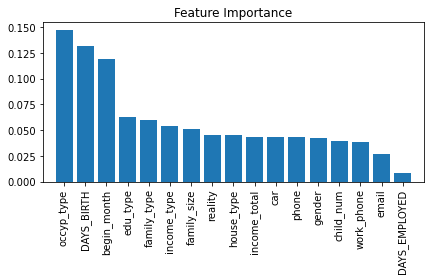

In [14]:
import matplotlib.pyplot as plt

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %s" % (f+1, 30, 
                            feat_labels[indices[f]],
                           importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),
       importances[indices],
       align='center')

plt.xticks(range(X_train.shape[1]),
          feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

## 4-2. Logistic-Regression

In [15]:
lr = LogisticRegression()

lr_param_grid = {"C" : [0.01, 0.1, 1.0],
                "solver" : ['sag', 'saga'],
                 "max_iter" : [500],
                "random_state" : [42]}

gs_lr = GridSearchCV(lr, lr_param_grid,
                    cv=k_fold, scoring="neg_log_loss", verbose=1, n_jobs=-1)

gs_lr.fit(X_train, y_train)

lr_best = gs_lr.best_estimator_

print('best_score : ', gs_lr.best_score_)
print('best_params : \n', gs_lr.best_params_)

lr_best.fit(X_train, y_train)

val_pred_lr = lr_best.predict_proba(X_val)
predict_lr = lr_best.predict_proba(X_test)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
best_score :  -0.86922395256809
best_params : 
 {'C': 0.01, 'max_iter': 500, 'random_state': 42, 'solver': 'saga'}


### 4-2-1. Logistic-Regression (without GridSearchCV)

In [15]:
lr_best = LogisticRegression(C=0.01, max_iter=500, random_state=42, solver='saga')

lr_best.fit(X_train, y_train)

val_pred_lr = lr_best.predict_proba(X_val)
predict_lr = lr_best.predict_proba(X_test)

## 4-3. SVM

In [16]:
svm = SVC()

svm_param_grid = {"C" : [10.0, 100.],
                  "kernel" : ['linear', 'rbf'],
                  "decision_function_shape" : ['ovo'],
                  "random_state" : [42],
                  "probability" : [True]}

gs_svm = GridSearchCV(svm, svm_param_grid,
                     cv=k_fold, scoring="accuracy", verbose=1, n_jobs=-1) # neg_log_loss => non_finite..

gs_svm.fit(X_train, y_train)

svm_best = gs_svm.best_estimator_

print('best_score : ', gs_svm.best_score_)
print('best_params : ', gs_svm.best_params_)

svm_best.fit(X_train, y_train)

val_pred_svm = svm_best.predict_proba(X_val)
predict_svm = svm_best.predict_proba(X_test)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
best_score :  0.6441494178034639
best_params :  {'C': 100.0, 'decision_function_shape': 'ovo', 'kernel': 'rbf', 'probability': True, 'random_state': 42}


### 4-3-1. SVM (without GridSearchCV)

In [19]:
from sklearn.svm import SVC

svm_best = SVC(C=100.0, decision_function_shape='ovo', kernel='rbf', probability=True, random_state=42)

svm_best.fit(X_train, y_train)

val_pred_svm = svm_best.predict_proba(X_val)
predict_svm = svm_best.predict_proba(X_test)

## 4-4. Ensemble

### 4-4-1. Voting(RandomForest, LogisticRegression, SVM)

In [20]:
voting = VotingClassifier(estimators=[('forest', forest_best),
                                      ('lr', lr_best),
                                      ('svm', svm_best)],
                         voting='soft',
                         n_jobs=-1)

"""
scores = cross_val_score(estimator=voting,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=-1)

print('CV 정확도: {} +/- {}'.format(np.mean(scores), np.std(scores)))
"""

voting = voting.fit(X_train, y_train)

val_pred_voting = voting.predict_proba(X_val)
predict_voting = voting.predict_proba(X_test)

### 4-4-2. GradientBoostingClassifier

In [25]:
boost = GradientBoostingClassifier()

boost_param_grid = {"n_estimators" : [300, 500],
                   "criterion" : ['friedman_mse', 'mse'],
                   "n_iter_no_change" : [9, 11],
                   "learning_rate" : [0.1, 1.0],
                   "random_state" : [42]}

gs_boost = GridSearchCV(boost, boost_param_grid,
                       cv=k_fold, scoring="neg_log_loss", verbose=1, n_jobs=-1)

gs_boost.fit(X_train, y_train)

boost_best = gs_boost.best_estimator_

print("best score : ", gs_boost.best_score_)
print("best params : \n", gs_boost.best_params_)

val_pred_boost = boost_best.predict_proba(X_val)
predict_boost = boost_best.predict_proba(X_test)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
best score :  -0.8586746328282524
best params : 
 {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'n_estimators': 300, 'n_iter_no_change': 11, 'random_state': 42}


# 5. Feature select by RandomForest

In [ ]:
X_train_ = X_train.drop(['work_phone', 'email', 'DAYS_EMPLOYED'], axis=1)
X_val_ = X_val.drop(['work_phone', 'email', 'DAYS_EMPLOYED'], axis=1)
X_test_ = X_test.drop(['work_phone', 'email', 'DAYS_EMPLOYED'], axis=1)

## 5-1. RandomForest

In [27]:
ft_forest = RandomForestClassifier()

ft_forest_param_grid = {"max_depth" : [13, 15, 17],
                    "n_estimators" : [500, 600],
                    "criterion" : ["gini", "entropy"],
                    "random_state" : [42]}

gs_ft_forest = GridSearchCV(ft_forest, ft_forest_param_grid, 
                            cv=k_fold, scoring="neg_log_loss", verbose=1, n_jobs=-1)

gs_ft_forest.fit(X_train_, y_train)

ft_forest_best = gs_ft_forest.best_estimator_

print('best_score : ', gs_ft_forest.best_score_)
print('best_params : \n', gs_ft_forest.best_params_)

ft_forest_best.fit(X_train_, y_train)

importances = ft_forest_best.feature_importances_

ft_val_pred_forest = ft_forest_best.predict_proba(X_val_)
ft_predict_forest = ft_forest_best.predict_proba(X_test_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
best_score :  -0.8215353483158501
best_params : 
 {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 500, 'random_state': 42}


## 5-2. Logistic-Regression

In [28]:
ft_lr = LogisticRegression()

ft_lr_param_grid = {"C" : [0.01, 0.1, 1.0],
                "solver" : ['sag', 'saga'],
                 "max_iter" : [500],
                "random_state" : [42]}

gs_ft_lr = GridSearchCV(ft_lr, ft_lr_param_grid,
                        cv=k_fold, scoring="neg_log_loss", verbose=1, n_jobs=-1)

gs_ft_lr.fit(X_train_, y_train)

ft_lr_best = gs_ft_lr.best_estimator_

print('best_score : ', gs_ft_lr.best_score_)
print('best_params : \n', gs_ft_lr.best_params_)

ft_lr_best.fit(X_train_, y_train)

ft_val_pred_lr = ft_lr_best.predict_proba(X_val_)
ft_predict_lr = ft_lr_best.predict_proba(X_test_)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
best_score :  -0.869322776069478
best_params : 
 {'C': 0.01, 'max_iter': 500, 'random_state': 42, 'solver': 'saga'}


# 5-3. SVM

In [ ]:
ft_svm = SVC()

ft_svm_param_grid = {"C" : [10.0, 100.0],
                  "kernel" : ['linear', 'rbf'],
                  "decision_function_shape" : ['ovo'],
                  "random_state" : [42],
                    "probability" : [True]}

gs_ft_svm = GridSearchCV(ft_svm, ft_svm_param_grid,
                         cv=k_fold, scoring="accuracy", verbose=1, n_jobs=-1)

gs_ft_svm.fit(X_train_, y_train)

ft_svm_best = gs_ft_svm.best_estimator_

print('best_score : ', gs_ft_svm.best_score_)
print('best_params : ', gs_ft_svm.best_params_)

ft_svm_best.fit(X_train_, y_train)

val_pred_svm = svm_best.predict_proba(X_val_)
predict_svm = svm_best.predict_proba(X_test_)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


## 5-4. Ensemble(Voting)

In [ ]:
kfold_ = k_fold.split(X_train_, y_train)

ft_voting = VotingClassifier(estimators=[('forest', ft_forest_best),
                                      ('lr', ft_lr_best),
                                      ('svm', ft_svm_best)],
                         voting='soft',
                         n_jobs=-1)

scores = cross_val_score(estimator=ft_voting,
                         X=X_train_,
                         y=y_train,
                         cv=10,
                         n_jobs=-1)

print('CV 정확도: {} +/- {}'.format(np.mean(scores), np.std(scores)))

ft_voting = ft_voting.fit(X_train_, y_train)

ft_val_pred_voting = ft_voting.predict_proba(X_val_)
ft_predict_voting = ft_voting.predict_proba(X_test_)

# 6. Evaluating

## 6-1. log-loss

In [16]:
from sklearn.metrics import log_loss
from tensorflow.keras.utils import to_categorical

### 6-1-1. RandomForest

In [17]:
logloss = log_loss(to_categorical(y_val), val_pred_forest)
print(logloss)

0.818554454757765


In [ ]:
logloss = log_loss(to_categorical(y_val), ft_val_pred_forest)
print(logloss)

### 6-1-2. Logistic-Regression

In [18]:
logloss = log_loss(to_categorical(y_val), val_pred_lr)
print(logloss)

0.8687497380016785


In [ ]:
logloss = log_loss(to_categorical(y_val), ft_val_pred_lr)
print(logloss)

### 6-1-3. SVM

In [21]:
logloss = log_loss(to_categorical(y_val), val_pred_svm)
print(logloss)

0.8599428837478625


In [ ]:
logloss = log_loss(to_categorical(y_val), ft_val_pred_svm)
print(logloss)

### 6-1-4. Ensemble(Voting)

In [22]:
logloss = log_loss(to_categorical(y_val), val_pred_voting)
print(logloss)

0.8332585752981089


In [ ]:
logloss = log_loss(to_categorical(y_val), ft_val_pred_voting)
print(logloss)

# 7. Submission file

In [26]:
predict_forest = pd.DataFrame(predict_forest)
predict_voting = pd.DataFrame(predict_voting)
predict_boost = pd.DataFrame(predict_boost)

predict_forest.columns = ['0', '1', '2']
predict_voting.columns = ['0', '1', '2']
predict_boost.columns = ['0', '1', '2']

In [26]:
submission['0'] = predict_forest['0']
submission['1'] = predict_forest['1']
submission['2'] = predict_forest['2']
submission

,index,0,1,2
0,26457,0.081017,0.131953,0.787030
1,26458,0.133665,0.177683,0.688652
2,26459,0.163711,0.196170,0.640120
3,26460,0.123927,0.127327,0.748746
4,26461,0.092018,0.425852,0.482130
...,...,...,...,...
9995,36452,0.125175,0.173043,0.701782
9996,36453,0.271431,0.166505,0.562064
9997,36454,0.057755,0.130214,0.812032
9998,36455,0.169135,0.281163,0.549702


In [27]:
submission.to_csv('submit_forest.csv', header=True, index=False)

In [28]:
submission['0'] = predict_voting['0']
submission['1'] = predict_voting['1']
submission['2'] = predict_voting['2']
submission

,index,0,1,2
0,26457,0.110488,0.148594,0.740918
1,26458,0.130385,0.184451,0.685164
2,26459,0.136674,0.209580,0.653746
3,26460,0.123778,0.157228,0.718993
4,26461,0.117529,0.314373,0.568099
...,...,...,...,...
9995,36452,0.122660,0.194939,0.682401
9996,36453,0.170281,0.201959,0.627760
9997,36454,0.082560,0.165988,0.751452
9998,36455,0.136916,0.226087,0.636997


In [29]:
submission.to_csv('submit_voting.csv', header=True, index=False)

In [27]:
submission['0'] = predict_boost['0']
submission['1'] = predict_boost['1']
submission['2'] = predict_boost['2']
submission

,index,0,1,2
0,26457,0.118058,0.194770,0.687172
1,26458,0.144242,0.181501,0.674257
2,26459,0.153905,0.188913,0.657181
3,26460,0.137521,0.134490,0.727989
4,26461,0.124902,0.324060,0.551038
...,...,...,...,...
9995,36452,0.110646,0.265781,0.623573
9996,36453,0.136731,0.224913,0.638355
9997,36454,0.064811,0.169053,0.766136
9998,36455,0.105499,0.130794,0.763707


In [28]:
submission.to_csv('submit_boost.csv', header=True, index=False)